# Imports

In [ ]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import linregress


# Question 2: Generative Graph Models & Genetic Encodings

## Part 1

### Helpers

In [18]:
import numpy as np

def generate_nodes(b):
    N = 2**b
    return [format(i, f'0{b}b') for i in range(N)]

def matches(node, pattern):    
    return all(p == 'X' or p == n for n, p in zip(node, pattern))

def get_indices(nodes, pattern):    
    return [idx for idx, node in enumerate(nodes) if matches(node, pattern)]

def build_adjacency_matrix(b):
    nodes = generate_nodes(b)
    N = len(nodes)
    adj = np.zeros((N, N), dtype=int)
    for i in range(b + 1):
        Si = '0'*i + 'X'*(b-i)
        Di = 'X'*i + '1'*(b-i)
        sources = get_indices(nodes, Si)
        destinations = get_indices(nodes, Di)
        for s in sources:
            for d in destinations:
                adj[s, d] = 1
    return adj


### Simulations

In [19]:
b = 10
adj_matrix = build_adjacency_matrix(b)
print(adj_matrix)

[[1 1 1 ... 1 1 1]
 [0 1 0 ... 1 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


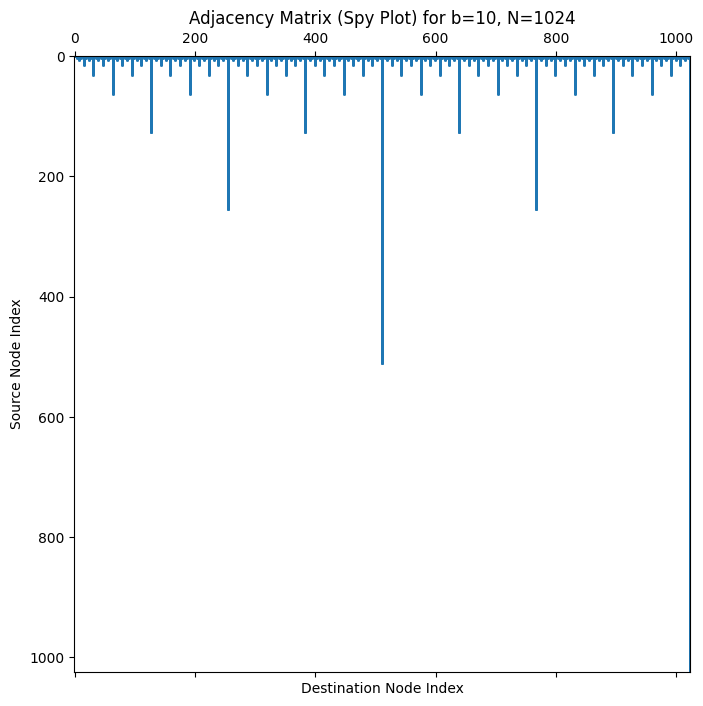

In [20]:
plt.figure(figsize=(8,8))
plt.spy(adj_matrix, markersize=1)
plt.title("Adjacency Matrix (Spy Plot) for b=10, N=1024")
plt.xlabel("Destination Node Index")
plt.ylabel("Source Node Index")
plt.show()
